In [ ]:
import sys; sys.path.insert(0, '../')

from Classifiers.GPTClassifier import GPTClassifier
from utils.helper_functions import ipynb_to_json, notebook_extract_code, notebook_add_class_labels, kaggle_pull_competiton
from utils.constants import FIRST_LAYER_LABELS, SECOND_LAYER_LABELS, BLANK_IPYNB_JSON

In [ ]:
with open('../../secrets/api_key.txt', 'r') as f: api_key = f'{f.read()}'


LABELS = FIRST_LAYER_LABELS
# LABELS = SECOND_LAYER_LABELS


print(f"Initializing classifier...")
prompt = f"""You will be given each code cell of the same jupyter notebook of a machine learning task.
First, classify the code into one {', '.join(LABELS[:-1])} or {LABELS[-1]}.
Consider the previously classified code snippets for context.
Then, describe what the code snippet does in strictly one sentence.
Explain your reasoning for the classification and then output the desired format at the end.
Desired format:
Class: <class_label>
Description: <desctiption_sentence>
""" 
classifier = GPTClassifier(api_key=api_key, prompt=prompt, labels=LABELS)

In [ ]:
import glob
import random
import json

test_dataset_dir = "/home/ryounis/Documents/Zurich/PEACHLab/backend/data/test_datasets/Natural Language Processing with Disaster Tweets"
notebook_files = glob.glob(test_dataset_dir + "/*.ipynb")
indices = list(range(len(notebook_files)))
random.shuffle(indices)

n_notebooks = 30
truth = []
pred = []
while n_notebooks > 0:
    idx = indices.pop()
    file = open(notebook_files[idx], 'r')
    notebook_name = notebook_files[idx].split('.')[0]
    notebook_json = json.load(file)
    
    if len([cell for cell in notebook_json['cells'] if cell['cell_type'] == 'code']) >= 15:
        print(f"[{31 - n_notebooks}] Classifying notebook {notebook_name} ({idx+1}/{len(notebook_files)})...")

        accuracy, misclassification_dict, truths, preds = classifier.evaluate(notebook_json, verbose=True)
        truth += truths
        pred += preds
        n_notebooks -= 1
    

In [5]:
print(len(truth), len(pred))

1121 1121


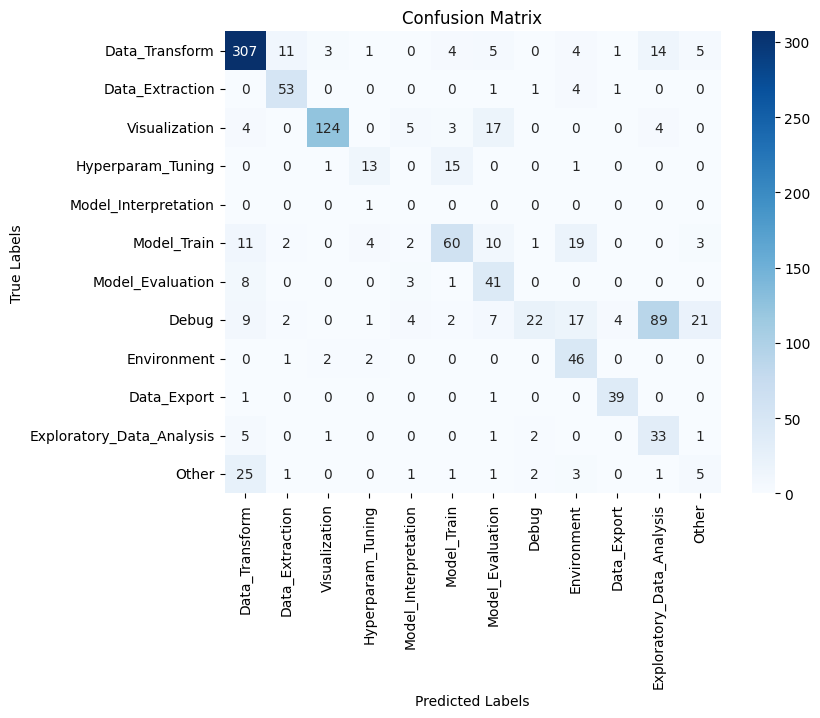

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example true and predicted labels
true_labels = truth
predicted_labels = pred

# Define your class labels
labels = LABELS

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=labels)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
